# Quantum Hall effect and disorder 

In [1]:
import kwant
from kwant.digest import uniform    # a (deterministic) pseudorandom number generator

In [2]:
import numpy as np
from cmath import exp
import matplotlib.pyplot as plt
from types import SimpleNamespace

Particular about this example is that we have now both the onsite energies and the hoppings position-dependent. Hence, we need to define functions for both:

In [4]:
lat = kwant.lattice.square(a=1)

t = 1
W = 30
L = 50

def onsite(site, params):
    return  params.U0 * (uniform(repr(site), repr(params.salt)) - 0.5) + 4 * t

def hopping(site_i, site_j, params):
    xi, yi = site_i.pos
    xj, yj = site_j.pos
    return -exp(-0.5j * params.phi * (xi - xj) * (yi + yj))

sys = kwant.Builder()
sys[(lat(x, y) for x in range(L) for y in range(W))] = onsite
sys[lat.neighbors()] = hopping

lead = kwant.Builder(kwant.TranslationalSymmetry([-1, 0]))
lead[(lat(0, y) for y in range(W))] = 4 * t   # no disorder in lead!
lead[lat.neighbors()] = hopping

sys.attach_lead(lead)
sys.attach_lead(lead.reversed())

sys = sys.finalized()

/tmp/ipykernel_363060/1895301109.py:1: RuntimeWarning: Kwant's plotting functions have
the side effect of selecting the matplotlib backend. To avoid this warning,
import matplotlib.pyplot, matplotlib.backends or call matplotlib.use().
  kwant.plot(sys);


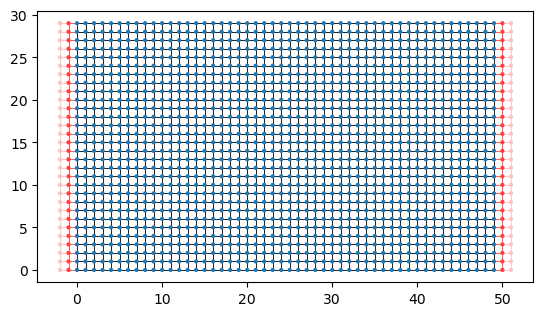

In [6]:
kwant.plot(sys);

#### Formation of edge channels

Let's first show how the Landau levels are formed by cranking up the magnetic field. We will plot the sum of all the wave function probabilities of all 

In [5]:
from ipywidgets import interact

In [ ]:
U0 = 0.3
salt = 13
energy = 0.2

def plot_wf(phi=0):
    params = SimpleNamespace(phi=phi, U0=U0, salt=salt)
    wfs = kwant.wave_function(sys, energy=energy, args=[params])
    scattering_wf = wfs(0)  # all scattering wave functions from lead 0
    kwant.plotter.map(sys, np.sum(abs(scattering_wf)**2, axis=0));

interact(plot_wf, phi=(0, 0.15, 0.002))

#### Edge states in transport

Without disorder, we have seen that the conductance of a wire is quantized to the number
of modes in the wire. With disorder, there is scattering, and the conductance will be smaller than the clean wire case.

Increasing the magnetic field reduces scattering due to the formation of quantum Hall
edge channels. Hence, we recover conductance quantization:

Note how well-defined conductance plateaus form as the magnetic field is increased! 

You might ask, why overall conductance goes down: This is due to the Landau level degeneracy and spacing increasing with magnetic field. Hence, for larger field less Landau levels are occupied. As the number of Landau levels determines also the number of edge channels, we have less edge channels for increasing magnetic field

In [5]:
energy = 0.2
U0 = 0.3
salt = 13

phis = np.linspace(0, 0.1, 51)

Gs = []
for phi in phis:
    params = SimpleNamespace(phi=phi, U0=U0, salt=salt)
    smat = kwant.smatrix(sys, energy=energy, args=[params])
    Gs.append(smat.transmission(1, 0))
    
plt.plot(phis, Gs);
plt.ylabel("G [G_0]")
plt.xlabel("phi")

/tmp/ipykernel_363060/3490842363.py:10: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
  smat = kwant.smatrix(sys, energy=energy, args=[params])
/root/miniconda3/envs/kwant_env/lib/python3.8/site-packages/kwant/solvers/common.py:162: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
  lhs, norb = syst.hamiltonian_submatrix(args, sparse=True,
/root/miniconda3/envs/kwant_env/lib/python3.8/site-packages/kwant/solvers/common.py:191: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
  prop, stab = lead.modes(energy, args, params=params)
/root/miniconda3/envs/kwant_env/lib/python3.8/site-packages/kwant/system.py:315: KwantDeprecationWarning: The 'args' parameter has been deprecated since ver

error: (lrwork>=max(24*n,1)||lrwork==-1) failed for 10th keyword lrwork: zheevr:lrwork=1

## Your turn!

- add some more structure to the problem, for example by using a more interesting shape. Combine this example with the quantum point contact from the previous tutorial!
- write a function that computes the disorder strength necessary to obtain a given mean free path. Use this to choose different disorder strengths and see what happens to the wave function.
- *(probably too long for during the tutorial, but a nice exercise)* Knowing the connection
  between mean free path 
  $l_\text{mfp}$ and disorder strength $U_0$, check the dependence of the conductance at 
  zero magnetic field on the mean free path. In particular, you should (roughly) find
  
  $$ G = \frac{N}{1 + \frac{2}{\pi} \frac{L}{l_\text{mfp}}} $$
  
  where $N$ is the number of channels in the (clean) wire, and $L$ the wire length (see
  Beenakker, Rev. Mod. Phys. 69, 731 (1997). The factor $\frac{2}{\pi}$ is particular for
  2D)